# Kaggle: Santander Customer Transaction Prediction
Dataset: https://www.kaggle.com/competitions/santander-customer-transaction-prediction

## Step1 定義問題
- 這個問題是如何產生的？這個問題的預期產出是什麼？預測哪些客戶將會進行特定交易
- 它提供了哪些資訊、資料與變數？是個匿名的數據集, 包含用戶ID, Binary target和許多變數(Variable only)
- 會對這個問題可以產生什麼結果？可以進一步瞭解客戶的需求或提供客製化內容

### 選擇什麼方法？
- 該問題是監督還是非監督學習？監督式學習
- 該問題的結果是分類還是回歸？二元分類

## Step2 區分與整理 Train／Test 資料集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
test = pd.read_csv("test.csv")
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## Step3 進行探索式資料分析(EDA)

### A. 確認資料狀況

In [4]:
# 合併訓練與測試資料集
# test data和train data欄位差異:沒有target欄位
train_Y = train["target"]
df_train = train.drop(["target"], axis=1)
df = pd.concat([df_train,test], ignore_index=True)
print(df.shape)
df.head()

(400000, 201)


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
# 檢查缺失值
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({"Missing Ratio" : data_na})
    display(missing_data)
na_check(df)

,Missing Ratio


### 資料狀況筆記：此資料集沒有缺失值

### B. 樞紐分析與視覺化

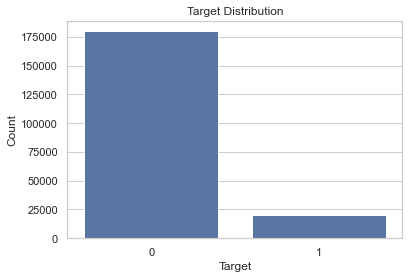

In [6]:
# 觀察target值分布
sns.set(style="whitegrid")
sns.countplot(train_Y, color=sns.color_palette()[0])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()

<Figure size 432x288 with 0 Axes>

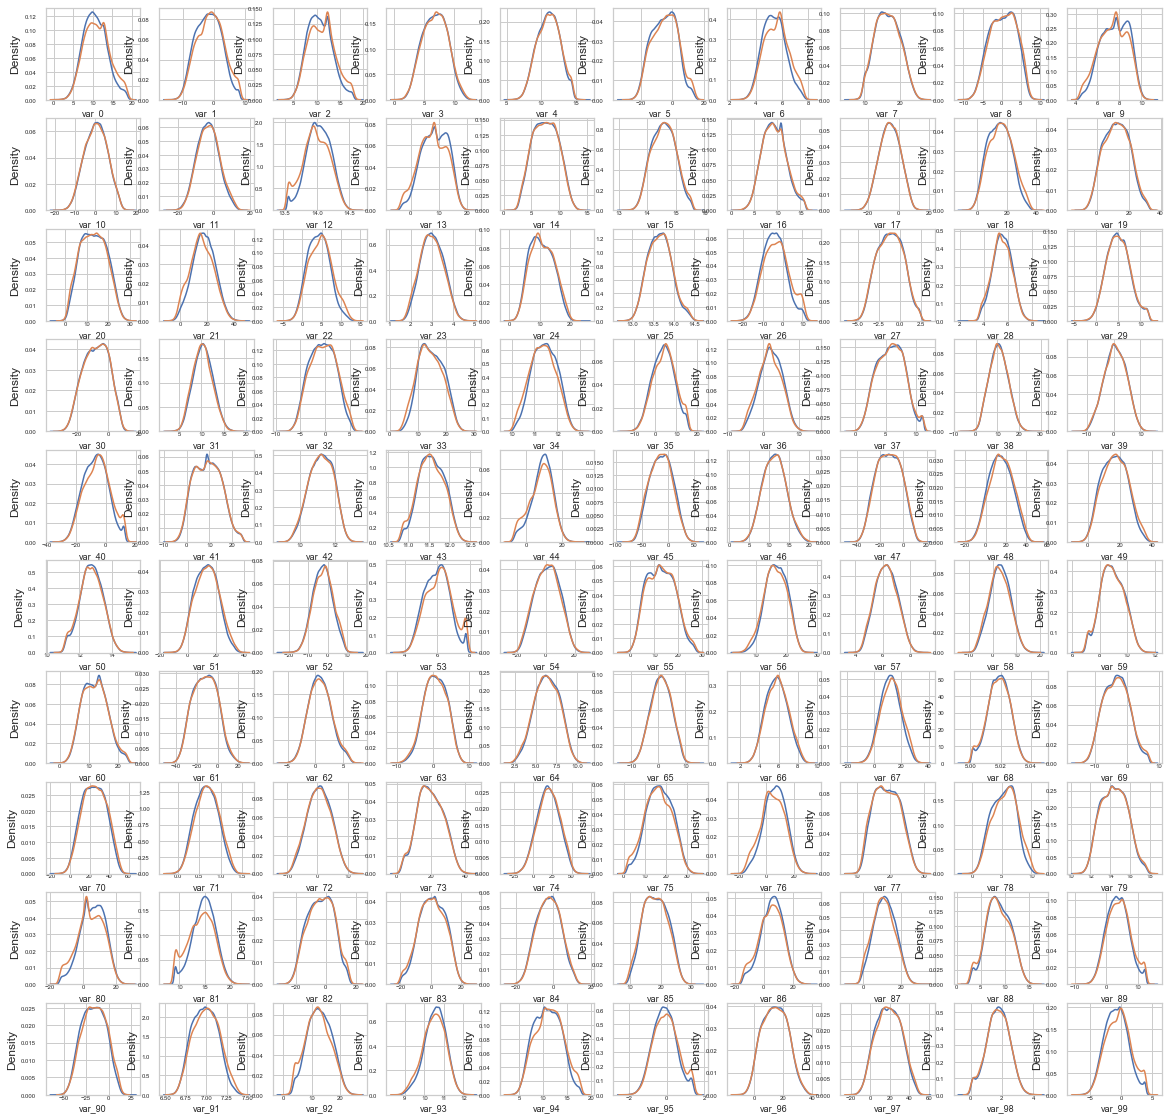

<Figure size 432x288 with 0 Axes>

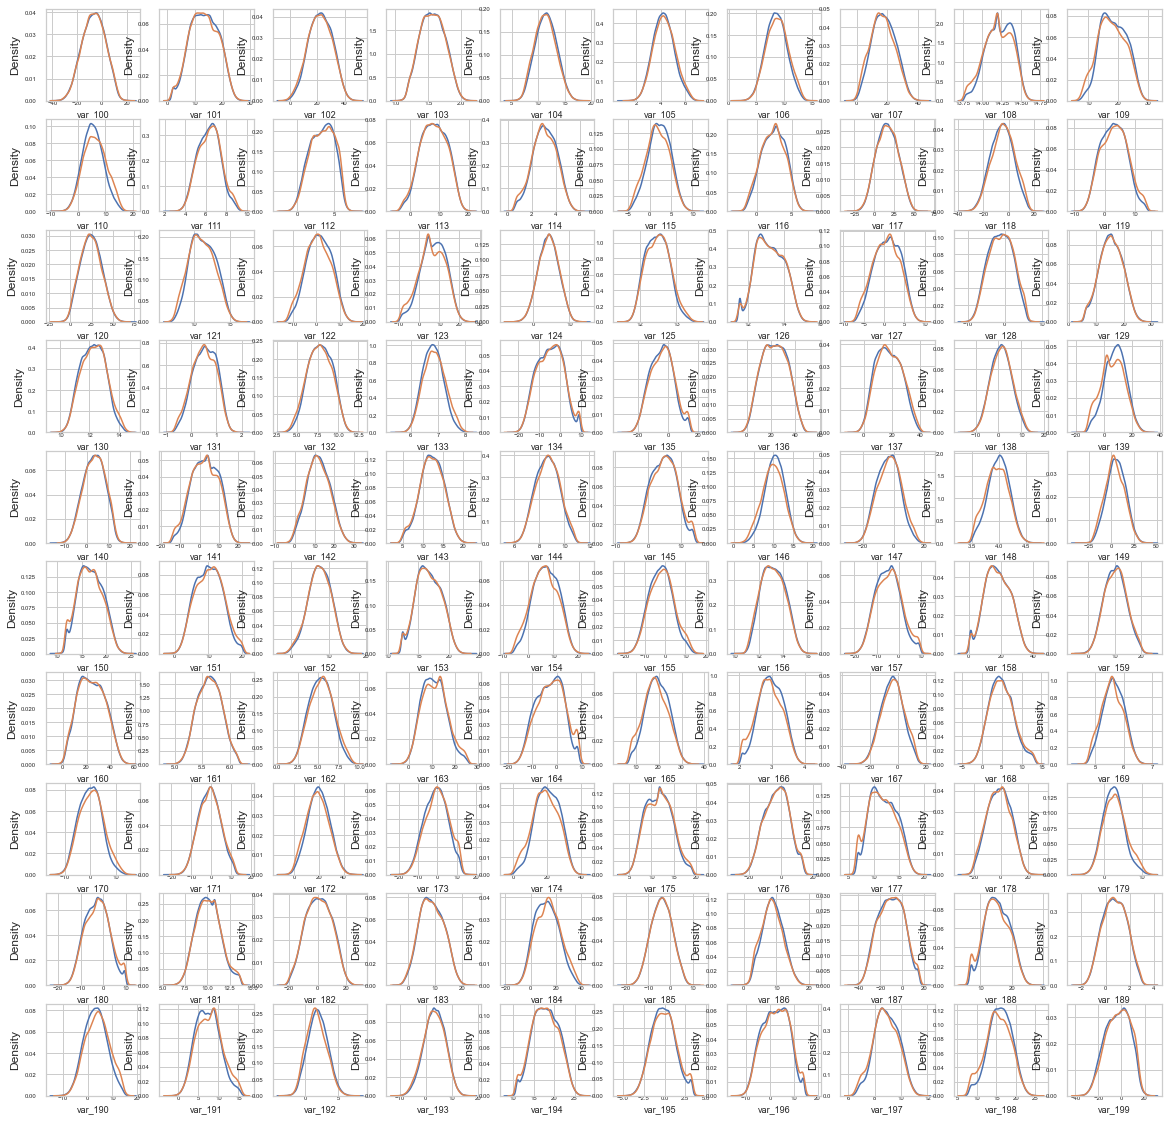

In [7]:
# 觀察200個參數(var_0~var_199)各別在target值=0,1情況下的分布
def variable_distribution(df1, df2, label1, label2, features):
    i = 0
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(20,20))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False, label=label1)
        sns.distplot(df2[feature], hist=False, label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
    
df0 = train.loc[train["target"] == 0]
df1 = train.loc[train["target"] == 1]
features = train.columns.values[2:102]
variable_distribution(df0, df1, "0", "1", features)
features = train.columns.values[102:202]
variable_distribution(df0, df1, "0", "1", features)

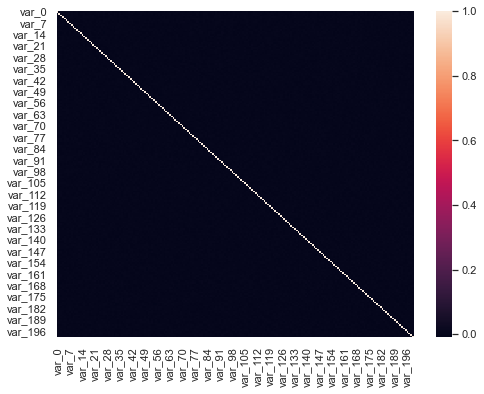

In [8]:
# 觀察200個參數(var_0~var199)彼此之間的correlation
df_var = train.drop(["ID_code","target"], axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(df_var.corr())
plt.show()

### 資料狀況筆記
- 參數的分布大致呈常態分佈
- 參數間沒有明顯的相關性(correlation)

## Step4 清理資料
### A. 檢查資料與確認缺失值
1. 是否有遺漏值/缺失值 (Missing value): NA
2. 是否有極值或異常值 (Outlier): NA
3. 資料分布是否符合常態 (Normal Distribution): 還算符合常態分佈, 也可以做標準化
4. 資料是否需要清洗 (Clean Data): NA  

### B. 進行資料加工
待辦清單
1. 拆分訓練與測試集的變數和目標值
2. 將變數資料做標準化

## Step5 模型建置與預測

### A. 特徵預處理 (Preprocessing)

In [9]:
# 1. 拆分訓練與測試集的變數和目標值
train_Y = train["target"]
train_X = train.drop(["ID_code","target"], axis=1)
test_X = test.drop(["ID_code"], axis=1)

In [10]:
# 2. 變數資料做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_X)
train_X_std = scaler.transform(train_X)
test_X_std = scaler.transform(test_X)

### B. 準備訓練／驗證集 (Train / Test Split)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X_std, train_Y, test_size=0.3, random_state=10)

### C. 訓練與評估模型 (Model Training)
使用default參數、設定random_state=10做預測

1. Logistic Regression
2. Random Forest
3. LightGBM

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

### 1. Logistic Regression

In [13]:
# 使用default參數預測
lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("Logistic Regression AUC: %.3f" % roc_auc_score(y_test, y_pred))

Logistic Regression Accuracy: 0.913
Logistic Regression AUC: 0.624


### 2. Random Forest

In [14]:
# 使用default參數預測
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("Random Forest AUC: %.3f" % roc_auc_score(y_test, y_pred))

Random Forest Accuracy: 0.900
Random Forest AUC: 0.500


In [15]:
# 調整參數
n_estimators = list(range(5,105,5))
max_depths = list(range(1,21))
min_samples_splits = list(range(1,21))
min_samples_leaves = list(range(1,21))
param_grid = {"n_estimators":n_estimators,"max_depth":max_depths,
              "min_samples_split":min_samples_splits,"min_samples_leaf":min_samples_leaves}

rf_rscv = RandomizedSearchCV(rf, param_grid, scoring="roc_auc", random_state=10, n_jobs=-1)
search_result = rf_rscv.fit(X_train, y_train)
print("Best AUC: %.3f using %s" % (search_result.best_score_, search_result.best_params_))

Best AUC: 0.826 using {'n_estimators': 70, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_depth': 18}


In [16]:
rf_bestparam = rf_rscv.best_estimator_
rf_bestparam.fit(X_train, y_train)
y_pred = rf_bestparam.predict(X_test)
print("Random Forest Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("Random Forest AUC: %.3f" % roc_auc_score(y_test, y_pred))

Random Forest Accuracy: 0.900
Random Forest AUC: 0.500


In [17]:
rf_pred = rf_bestparam.predict_proba(test_X_std)[:,1]
sub_rf = pd.DataFrame({"ID_code": test["ID_code"], "target": rf_pred})
sub_rf.to_csv("submission_rf.csv", index=False)

### 3. LightGBM

In [18]:
# 使用default參數預測
lgbm = LGBMClassifier(random_state=10)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("LightGBM Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("LightGBM AUC: %.3f" % roc_auc_score(y_test, y_pred))

LightGBM Accuracy: 0.908
LightGBM AUC: 0.546


In [19]:
# 調整參數
num_iterations = list(range(5,105,5)) #決策樹的個數
max_depth = list(range(1,21)) #樹的最大深度
min_data_in_leaf = list(range(1,21)) #一個子葉中最少數據
num_leaves = list(range(1,21)) #一棵樹葉子的節點個數
param_grid = {"num_iterations":num_iterations,"max_depth":max_depth,
              "min_data_in_leaf":min_data_in_leaf,"num_leaves":num_leaves}

lgbm_rscv = RandomizedSearchCV(lgbm, param_grid, scoring="roc_auc", random_state=10, n_jobs=-1)
search_result = lgbm_rscv.fit(X_train, y_train)
print("Best AUC: %.3f using %s" % (search_result.best_score_, search_result.best_params_))

[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
Best AUC: 0.858 using {'num_leaves': 16, 'num_iterations': 100, 'min_data_in_leaf': 4, 'max_depth': 14}


In [20]:
lgbm_bestparam = lgbm_rscv.best_estimator_
lgbm_bestparam.fit(X_train, y_train)
y_pred = lgbm_bestparam.predict(X_test)
print("LightGBM Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("LightGBM AUC: %.3f" % roc_auc_score(y_test, y_pred))

LightGBM Accuracy: 0.905
LightGBM AUC: 0.527


In [21]:
lgbm_pred = lgbm_bestparam.predict_proba(test_X_std)[:,1]
sub_lgbm = pd.DataFrame({"ID_code": test["ID_code"], "target": rf_pred})
sub_lgbm.to_csv("submission_lgbm.csv", index=False)

In [22]:
#Blending test
blending_pred = rf_pred*0.4 + lgbm_pred*0.6
sub_blending = pd.DataFrame({"ID_code": test["ID_code"], "target": blending_pred})
sub_blending.to_csv("submission_blending.csv", index=False)

### 模型預測結果筆記
1. 從Kaggle的成績結果來看，LightGBM成績和Random Forest一致(當然參數部分或許還可以優化)，不過train時間上快非常多
2. 此資料集並未提供各參數的名稱或用途，且從EDA分析來看並沒有看到明顯相關性或偏邊分布的情況，所以無法從Domain Knowlege去篩選參數，或需要找其他EDA分析方法做進一步的參數挑選
3. Kaggle上傳結果截圖  

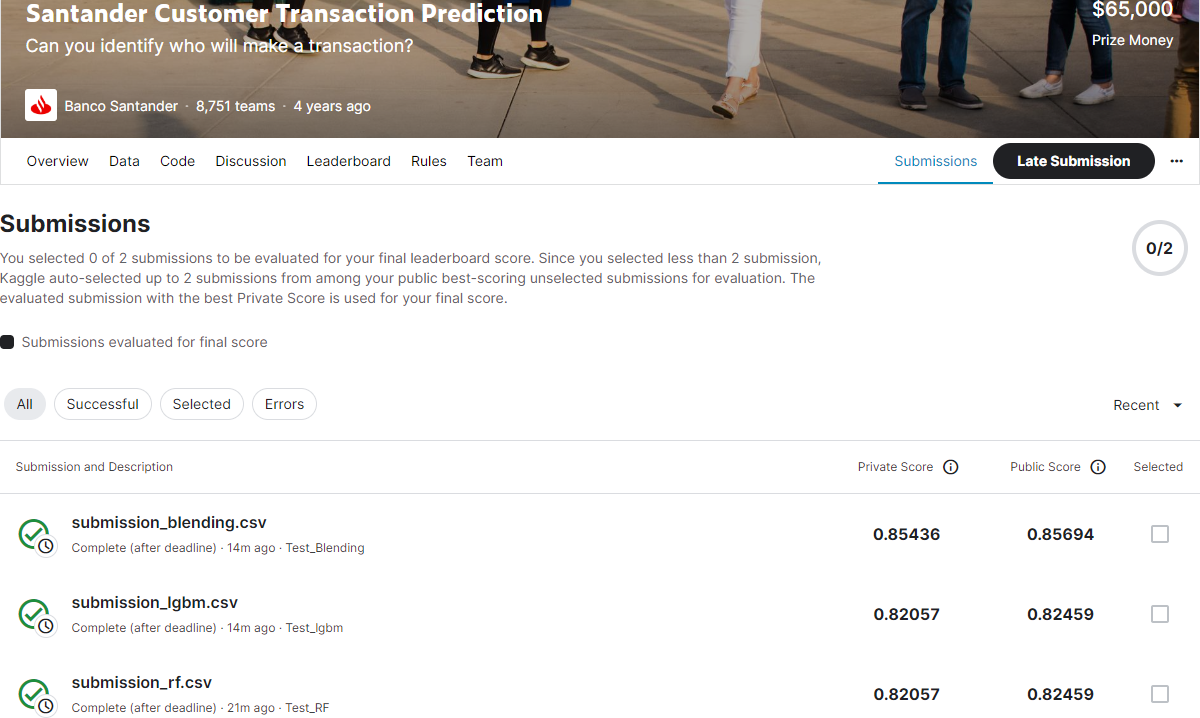